<a href="https://colab.research.google.com/github/ETropynina/ML_LR_Housung/blob/main/ML_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача - обучить линейную регрессию для предсказания стоимости домов в Калифорнии

In [5]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

In [8]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

In [12]:
X.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25


## Зависимости признаков от целевой переменной

In [13]:
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'House Price')

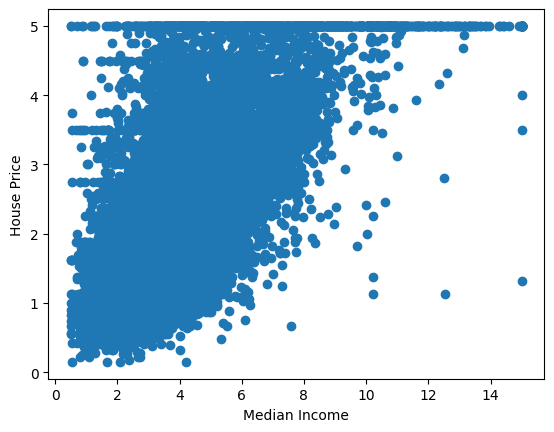

In [14]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

Text(0, 0.5, 'House Price')

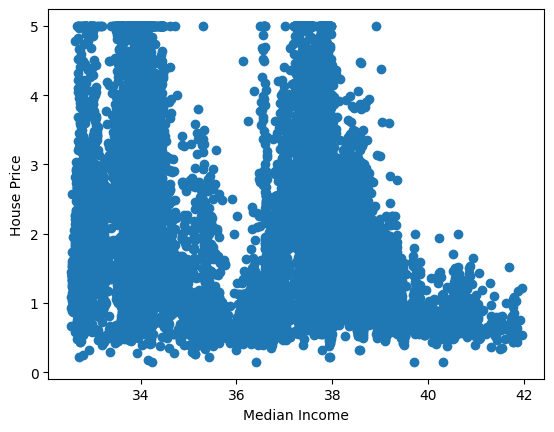

In [15]:
plt.scatter(X['Latitude'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

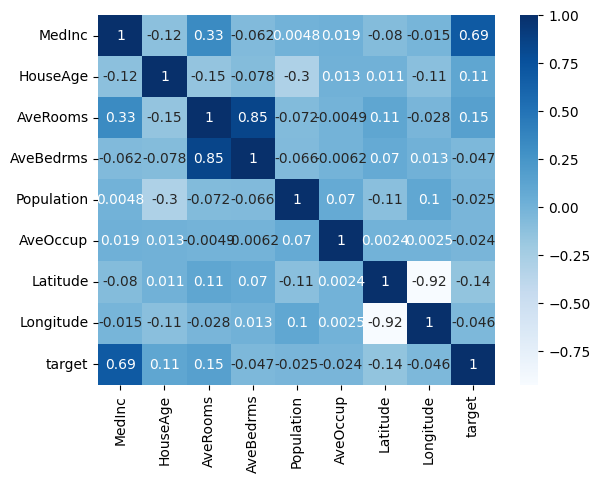

In [16]:
#Матрица корреляций
X['target'] = y

corr_1 = X.corr()

sb.heatmap(corr_1, cmap="Blues", annot=True);

In [17]:
X = X.drop(columns=['target'])

In [19]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

Создадим модель

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain, ytrain)

LinearRegression()

Вычислим значение метрики *MSE* на тестовых данных

In [25]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(Xtest)

round(mean_squared_error(ytest, prediction),2)

0.54